# K-MEANS

# Q.1


Your task is to apply k-means on iris dataset and see what happens when you change the value of k. Which solution, if any, do you find most compelling? Does complexity start to become an issue with this data set? Play around a bit and write up your findings and your process to share with your mentor. Keep in mind that it may be possible to have a solution with more than three clusters that is still better at tracking the real trinary outcome – two of those clusters may map to a single flower type while the other two map to the other types for example.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MiniBatchKMeans

from sklearn import datasets
from sklearn.cluster import KMeans


In [64]:
iris_data=pd.read_csv("iris.csv")
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### K=2

### 1st

In [65]:
df1=iris_data["SepalLengthCm"]
df2=iris_data["SepalWidthCm"]

new_df =pd.concat([df1, df2], axis=1, join='inner')
new_df


,SepalLengthCm,SepalWidthCm
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [66]:
new_df2=new_df.copy()

In [67]:
k_means=KMeans(2)
k_means.fit(new_df2)

KMeans(n_clusters=2)

In [68]:
clusters=new_df2.copy()
clusters["cluster_pred"]=k_means.fit_predict(new_df2)

Text(0, 0.5, 'SepalWidthCm')

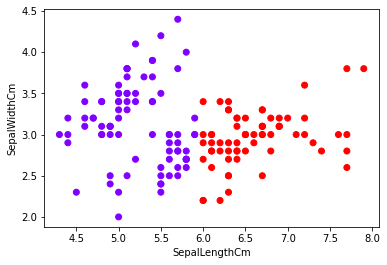

In [69]:
plt.scatter(clusters["SepalLengthCm"], clusters["SepalWidthCm"], c=clusters["cluster_pred"], cmap="rainbow")
plt.xlabel("SepalLengthCm")
plt.ylabel("SepalWidthCm")

### 2nd

In [70]:
df3=iris_data["PetalLengthCm"]
df4=iris_data["PetalWidthCm"]

new_df3 =pd.concat([df3, df4], axis=1, join='inner')
new_df3

,PetalLengthCm,PetalWidthCm
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [71]:
new_df4=new_df3.copy()

In [72]:
k_means2=KMeans(2)
k_means2.fit(new_df4)

KMeans(n_clusters=2)

In [73]:
clusters=new_df4.copy()
clusters["cluster_pred2"]=k_means2.fit_predict(new_df4)

Text(0, 0.5, 'PetalWidthCm')

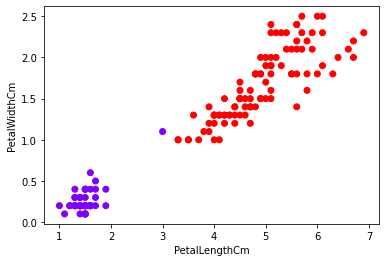

In [74]:
plt.scatter(clusters["PetalLengthCm"], clusters["PetalWidthCm"], c=clusters["cluster_pred2"], cmap="rainbow")
plt.xlabel("PetalLengthCm")
plt.ylabel("PetalWidthCm")

### K=3

In [75]:
x = iris_data.iloc[:, [1, 2, 3, 4]].values

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


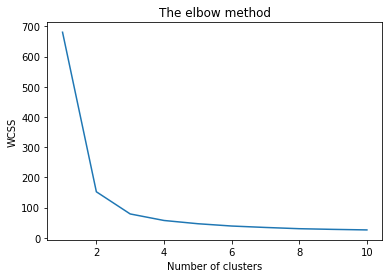

In [76]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

For K value, 2 and 3 are suitable

In [77]:
#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

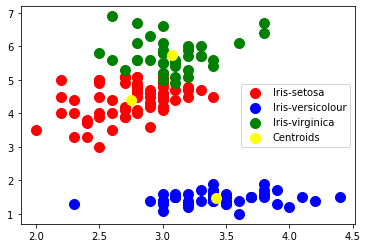

In [82]:
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 1], x[y_kmeans == 0, 2], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 1], x[y_kmeans == 1, 2], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 1], x[y_kmeans == 2, 2], s = 100, c = 'green', label = 'Iris-virginica')



#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:,2], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

# Q.2


In this assignment, you work with the heart disease data from the UC Irvine Machine Learning Repository. This dataset contains the records of the patients such that some of them have heart disease and some of them have not. Your task is to create a k-means solution that correctly assigns patients to "heart disease diagnosis" or "no heart disease diagnosis" clusters. Note that in this case, we actually know the correct number of clusters in the data which is two. But, you'll test whether k-means will assign observations as we expect it to do. Since k-means is an unsupervised learning algorithm, it will not use the information whether the patients have heart disease or not.

In [2]:
heart_df=pd.read_csv("heart.csv")
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1



1. age


2. sex

1 = male; 0 = female

3. chest pain type


4. resting blood pressure


5. serum cholestoral in mg/dl


6. fasting blood sugar > 120 mg/dl


7. resting electrocardiographic results (values 0,1,2)


8. maximum heart rate achieved


9. exercise induced angina


10. oldpeak = ST depression induced by exercise relative to rest


11. the slope of the peak exercise ST segment


12. number of major vessels (0-3) colored by flourosopy


13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect




In [3]:
X_h = heart_df.iloc[:, :13].values

In [23]:
# Define the features and the outcome
#X_h = heart_df.iloc[:, :13]
#y_h = heart_df.iloc[:, 13]

In [24]:
# Replace missing values (marked by ?) with a 0
#X_h = X_h.replace(to_replace='?', value=0)

In [25]:
# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis
#y_h = np.where(y_h > 0, 0, 1)

### Elbow Method

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


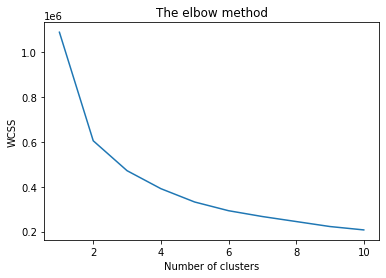

In [4]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss2 = []

for i in range(1, 11):
    kmeans_heart = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans_heart.fit(X_h)
    wcss2.append(kmeans_heart.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss2)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

For K, 2 is the best value

In [5]:
#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans_h = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans_h = kmeans_h.fit_predict(X_h)

### Age- Blood Pressure

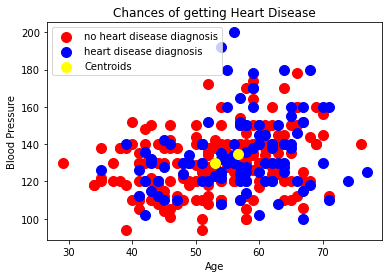

In [6]:
#Visualising the clusters
plt.scatter(X_h[y_kmeans_h == 0, 0], X_h[y_kmeans_h == 0, 3], s = 100, c = 'red', label = 'no heart disease diagnosis')
plt.scatter(X_h[y_kmeans_h == 1, 0], X_h[y_kmeans_h == 1, 3], s = 100, c = 'blue', label = 'heart disease diagnosis')

plt.title('Chances of getting Heart Disease')
plt.xlabel('Age')
plt.ylabel('Blood Pressure')




#Plotting the centroids of the clusters
plt.scatter(kmeans_h.cluster_centers_[:, 0], kmeans_h.cluster_centers_[:,3], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

### Age - Cholestrol

In [8]:
kmeans_hh = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans_hh = kmeans_hh.fit_predict(X_h)

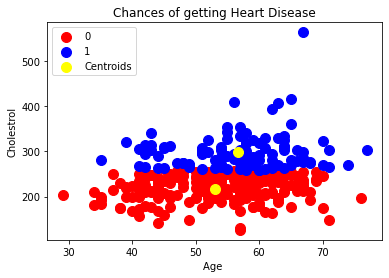

In [10]:
plt.scatter(X_h[y_kmeans_hh == 0, 0], X_h[y_kmeans_hh == 0,4], s = 100, c = 'red', label = '0')
plt.scatter(X_h[y_kmeans_hh == 1, 0], X_h[y_kmeans_hh == 1, 4], s = 100, c = 'blue', label = '1')


#Plotting the centroids of the clusters
plt.scatter(kmeans_h.cluster_centers_[:, 0], kmeans_h.cluster_centers_[:,4], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()
plt.title('Chances of getting Heart Disease')
plt.xlabel('Age ')
plt.ylabel('Cholestrol')
plt.legend()
plt.show()